Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
% matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(6,4))

In [107]:
engage_df = pd.read_csv("takehome_user_engagement.csv",parse_dates=True)
users_df = pd.read_csv("takehome_users.csv",parse_dates=True, encoding = 'latin1')

In [108]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [109]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [110]:
engage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [111]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [112]:
# Make timestamp a datetime object
engage_df['time_stamp'] = pd.to_datetime(engage_df['time_stamp'])

In [113]:
engage_df['visited'].unique()

array([1])

In [114]:
# How many values does 'visited' take?
sorted(list(engage_df['visited'].unique()))

[1]

In [115]:
# Are there the same number of unique users in each data set?
print('There are {} users who have ever used the application.'\
          .format(len(list(engage_df['user_id'].unique()))))
print('There are {} signed up for the application.'\
          .format(len(list(users_df['object_id'].unique()))))

print('There is a discrepancy of {} users.'\
          .format(int(len(list(users_df['object_id'].unique()))) 
                  - int(len(list(engage_df['user_id'].unique())))))

There are 8823 users who have ever used the application.
There are 12000 signed up for the application.
There is a discrepancy of 3177 users.


In [116]:
# create a dictionary that labels each user as adopted or not
adopted_dict = {}
seven_days = datetime.timedelta(7)
for user_id in sorted(list(engage_df['user_id'].unique())):
    adopted_user = False
    temp = engage_df[engage_df['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == True:
            continue
        this_time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_user = True
            
    adopted_dict[user_id] = adopted_user       

In [117]:
# Explore the user adoption labels
count_df = pd.DataFrame.from_dict(Counter(list(adopted_dict.values())), orient='index').reset_index()

print('We have analyzed logs for {} unique users.'.format(len(adopted_dict)))
print('{:.2f}% of users who have used the application are considered \'adopted users\'.'\
          .format(count_df.loc[1][1]/(count_df.loc[1][1]+count_df.loc[0][1])*100))

We have analyzed logs for 8823 unique users.
18.77% of users who have used the application are considered 'adopted users'.


In [118]:
# Create adopted target variable and display dataset again
users_df['adopted'] = False
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [119]:
# Replace adopted target class with correct flags
for row in (users_df[np.logical_not(users_df['last_session_creation_time'].isnull())]).itertuples():
    adopted_value = adopted_dict[users_df.get_value(row[0], 'object_id')]
    users_df.set_value(row[0], 'adopted', adopted_value)
    
print('{:.2f}% of all users who have signed up for the application are considered \'adopted users\'.'\
          .format(len(users_df[users_df['adopted'] == True])/len(users_df)*100))

13.80% of all users who have signed up for the application are considered 'adopted users'.


In [120]:
# Check on the higher risk/more defined features
for feature in ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']:
    print('{} feature:'.format(feature))
    print(users_df[feature].value_counts(), end='\n\n')


creation_source feature:
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

opted_in_to_mailing_list feature:
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

enabled_for_marketing_drip feature:
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64



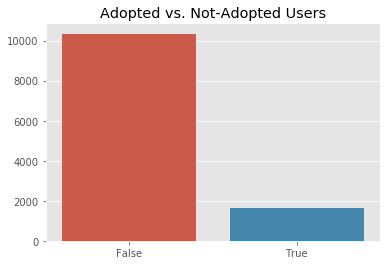

In [121]:
# Take a look at the distribution of the target class
sns.barplot(x = list(users_df['adopted'].value_counts().index), y = users_df['adopted'].value_counts())
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users');

In [122]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null bool
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [123]:
#Describing dummy keys of the output variable column
y_n_lookup ={True : 1, False : 0}
users_df['y_dummy'] = users_df['adopted'].map(lambda x: y_n_lookup[x])
users_df['y_dummy'].value_counts()

0    10344
1     1656
Name: y_dummy, dtype: int64

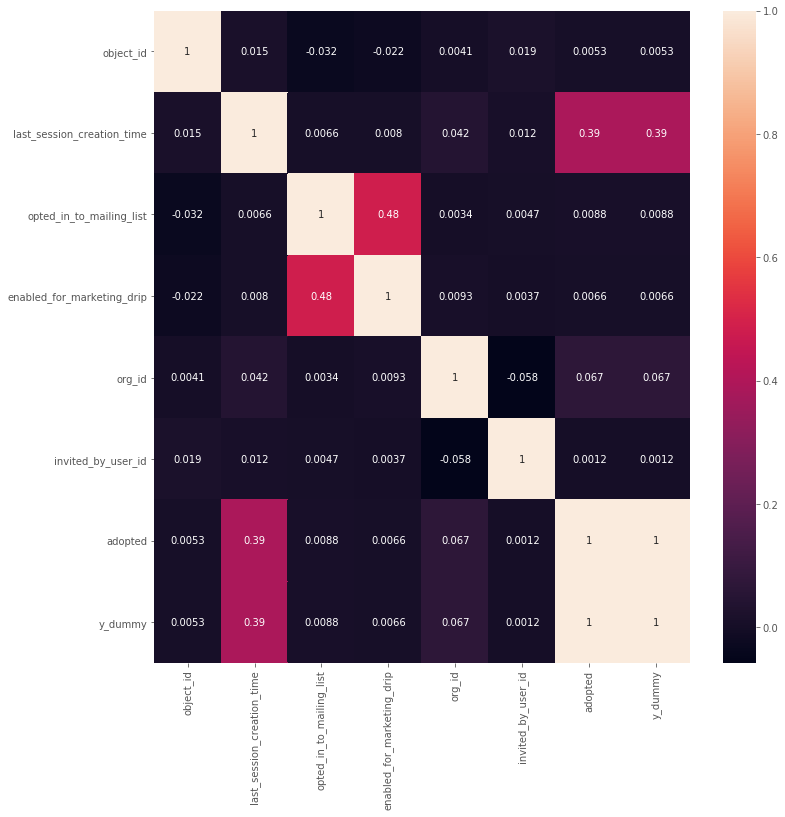

In [124]:
# What are the correlations between all columns?
plt.figure(figsize=(12,12))
#del df['ID']
sns.heatmap(users_df.corr(), annot =True)
plt.show()

In [82]:
users_df = users_df.drop(['email','last_session_creation_time','object_id','creation_time','name','invited_by_user_id'],axis =1)

In [83]:
#from sklearn.ensemble import RandomForestClassifier
#rm_bal = RandomForestClassifier(class_weight = 'balanced')
#rm_bal.fit(data_train, label_train)
#rm_score_train_bal = rm_bal.score(data_train, label_train)
#print("Training score: ",rm_score_train_bal)
#rm_score_test_bal = rm_bal.score(data_test, label_test)
#print("Testing score: ",rm_score_test_bal)

In [84]:
# One-hot-encode creation_source
df_encoded = pd.get_dummies(users_df, columns = ['creation_source'])

df_encoded.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,False,1,0,0,0,0
1,0,0,1,True,0,1,0,0,0
2,0,0,94,False,0,1,0,0,0
3,0,0,1,False,1,0,0,0,0
4,0,0,193,False,1,0,0,0,0


In [85]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Split into train and test sets

train, test = train_test_split(df_encoded, test_size=.30, 
                               random_state=42, stratify=users_df['adopted'])

train.reset_index(drop=True, inplace=True)
target = train['adopted']
train = train.drop('adopted', axis=1)

test.reset_index(drop=True, inplace=True)
test_target = test['adopted']
test = test.drop('adopted', axis=1)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))

Train shape: (8400, 8)
 Test shape: (3600, 8)


In [87]:
#decision tree after taking action on skewed data of target variable
from sklearn.ensemble import RandomForestClassifier
rm_bal = RandomForestClassifier(class_weight = 'balanced')
rm_bal.fit(train, target)
rm_score_train_bal = rm_bal.score(train, target)
print("Training score: ",rm_score_train_bal)
rm_score_test_bal = rm_bal.score(test, test_target)
print("Testing score: ",rm_score_test_bal)

Training score:  0.842738095238
Testing score:  0.724166666667


In [88]:
clf = RandomForestClassifier(class_weight = 'balanced')

cv = cross_validation.KFold(len(train), n_folds=10)

cv_count = 1
for traincv, testcv in cv:  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1

Round 1 CV
Accuracy: 74.76
AUC: 0.5224
Confusion Matrix:
[[603 115]
 [ 97  25]]


Round 2 CV
Accuracy: 72.02
AUC: 0.5297
Confusion Matrix:
[[572 138]
 [ 97  33]]


Round 3 CV
Accuracy: 75.95
AUC: 0.5445
Confusion Matrix:
[[610 119]
 [ 83  28]]


Round 4 CV
Accuracy: 72.62
AUC: 0.4967
Confusion Matrix:
[[589 132]
 [ 98  21]]


Round 5 CV
Accuracy: 73.33
AUC: 0.5100
Confusion Matrix:
[[593 135]
 [ 89  23]]


Round 6 CV
Accuracy: 72.98
AUC: 0.5099
Confusion Matrix:
[[590 143]
 [ 84  23]]


Round 7 CV
Accuracy: 70.00
AUC: 0.5002
Confusion Matrix:
[[562 162]
 [ 90  26]]


Round 8 CV
Accuracy: 75.00
AUC: 0.5276
Confusion Matrix:
[[605 124]
 [ 86  25]]


Round 9 CV
Accuracy: 71.90
AUC: 0.5357
Confusion Matrix:
[[572 156]
 [ 80  32]]


Round 10 CV
Accuracy: 74.76
AUC: 0.5337
Confusion Matrix:
[[600 121]
 [ 91  28]]




In [90]:
# Find feature importances
feature_importance = pd.DataFrame(rm_bal.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance = feature_importance.T
feature_importance.columns = ['feature_importance']
feature_importance.sort_values('feature_importance', ascending=False)

,feature_importance
org_id,0.935802
creation_source_PERSONAL_PROJECTS,0.015795
enabled_for_marketing_drip,0.015736
opted_in_to_mailing_list,0.014804
creation_source_SIGNUP_GOOGLE_AUTH,0.006451
creation_source_GUEST_INVITE,0.005424
creation_source_SIGNUP,0.003120
creation_source_ORG_INVITE,0.002869
